## Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?


In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
#I have selected the Albama state for analysis
selected_state_AL = "AL"
selected_state_NJ = "NJ"
selected_state_MD = "MD"
selected_state_NC = "NC"
#Reading the deaths data
deaths = pd.read_csv("../data/covid_deaths_usafacts.csv")
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,230
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,719,719,719,719,719,721,721,721,721,721
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108


In [3]:
# using the melt function so that we get the all the dates in one column and merging will be easy with enrichment data.
deaths_transpose = pd.melt(frame= deaths, id_vars=('countyFIPS','County Name','State','StateFIPS'), var_name=["Date"], value_name='Number of Deaths')
deaths_transpose = deaths_transpose[deaths_transpose['countyFIPS'] != 0]
deaths_transpose.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [4]:
deaths_selected_state = deaths_transpose[deaths_transpose["State"] == selected_state_AL]
deaths_selected_state.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [5]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_state_daily = deaths_selected_state.groupby('Date')['Number of Deaths'].sum()
deaths_selected_state_daily.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Deaths, dtype: int64

In [6]:
#Finding out the new deaths per day.
new_deaths_selected_state_daily = deaths_selected_state_daily.diff().reset_index()
new_deaths_selected_state_daily.head()

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [7]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_deaths_mean_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_mean_selected_state['Date'] = pd.to_datetime(weekly_deaths_mean_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mean_selected_state = weekly_deaths_mean_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].mean()
weekly_deaths_mean_selected_state = weekly_deaths_mean_selected_state.reset_index()
weekly_deaths_mean_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [8]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mean_selected_state_given_range = weekly_deaths_mean_selected_state[(weekly_deaths_mean_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_mean_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_mean_selected_state_given_range = weekly_deaths_mean_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mean_selected_state_given_range['Date'] = weekly_deaths_mean_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mean_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,1.857143
1,2022-06-06,4.000000
2,2022-06-13,0.571429
3,2022-06-20,4.714286
4,2022-06-27,4.285714
5,2022-07-04,3.857143
6,2022-07-11,5.142857
7,2022-07-18,7.142857
8,2022-07-25,2.714286
9,2022-08-01,11.857143


<AxesSubplot: title={'center': 'Mean of Weekly Albama Deaths'}, xlabel='Date'>

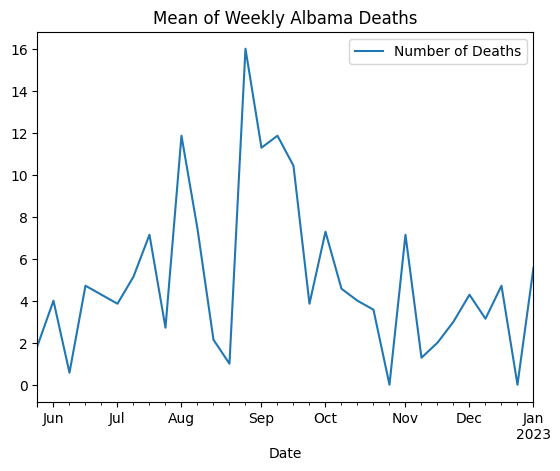

In [9]:
#Plotting the mean graph
weekly_deaths_mean_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Mean of Weekly Albama Deaths')

In [10]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_deaths_median_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_median_selected_state['Date'] = pd.to_datetime(weekly_deaths_median_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_median_selected_state = weekly_deaths_median_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].median()
weekly_deaths_median_selected_state = weekly_deaths_median_selected_state.reset_index()
weekly_deaths_median_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [11]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_median_selected_state_given_range = weekly_deaths_median_selected_state[(weekly_deaths_median_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_median_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_median_selected_state_given_range = weekly_deaths_median_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_median_selected_state_given_range['Date'] = weekly_deaths_median_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_median_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,1.0
4,2022-06-27,4.0
5,2022-07-04,0.0
6,2022-07-11,8.0
7,2022-07-18,7.0
8,2022-07-25,1.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Median of Weekly Albama Deaths'}, xlabel='Date'>

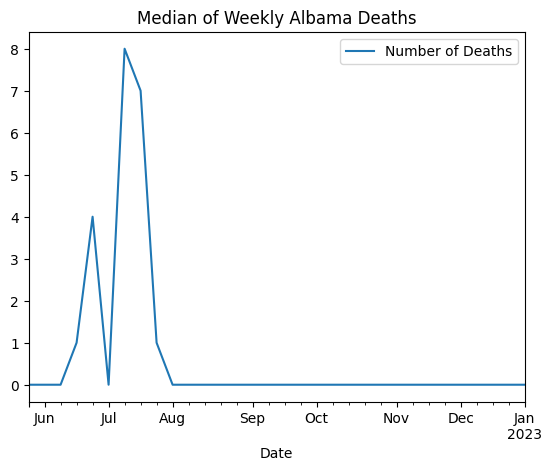

In [12]:
#Plotting the median graph
weekly_deaths_median_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Median of Weekly Albama Deaths')

In [13]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_deaths_mode_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_mode_selected_state['Date'] = pd.to_datetime(weekly_deaths_mode_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mode_selected_state = weekly_deaths_mode_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].apply(statistics.mode)
weekly_deaths_mode_selected_state = weekly_deaths_mode_selected_state.reset_index()
weekly_deaths_mode_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [14]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mode_selected_state_given_range = weekly_deaths_mode_selected_state[(weekly_deaths_mode_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_mode_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_mode_selected_state_given_range = weekly_deaths_mode_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mode_selected_state_given_range['Date'] = weekly_deaths_mode_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mode_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,5.0
5,2022-07-04,0.0
6,2022-07-11,9.0
7,2022-07-18,0.0
8,2022-07-25,1.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Albama Deaths'}, xlabel='Date'>

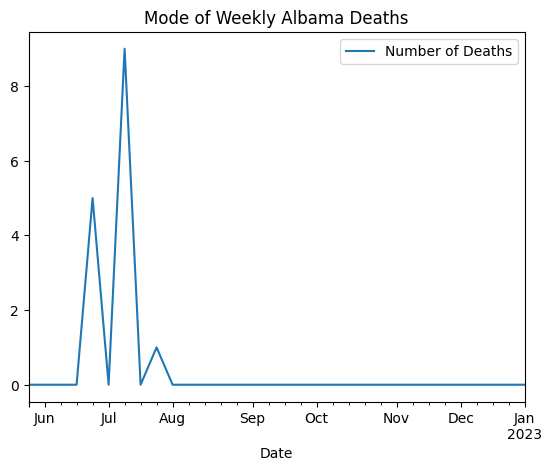

In [15]:
#Plottinf the mode graph
weekly_deaths_mode_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Mode of Weekly Albama Deaths')

In [16]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_deaths_sum_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_sum_selected_state['Date'] = pd.to_datetime(weekly_deaths_sum_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_sum_selected_state = weekly_deaths_sum_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_sum_selected_state = weekly_deaths_sum_selected_state.reset_index()
weekly_deaths_sum_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [17]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_deaths_sum_selected_state_given_range = weekly_deaths_sum_selected_state[(weekly_deaths_sum_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_sum_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_sum_selected_state_given_range = weekly_deaths_sum_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_sum_selected_state_given_range['Date'] = weekly_deaths_sum_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_sum_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,13.0
1,2022-06-06,28.0
2,2022-06-13,4.0
3,2022-06-20,33.0
4,2022-06-27,30.0
5,2022-07-04,27.0
6,2022-07-11,36.0
7,2022-07-18,50.0
8,2022-07-25,19.0
9,2022-08-01,83.0


<AxesSubplot: title={'center': 'Deaths of Weekly Albama Deaths'}, xlabel='Date'>

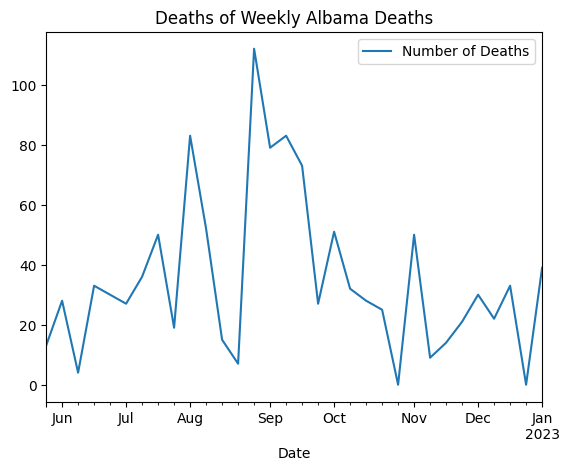

In [18]:
weekly_deaths_sum_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Deaths of Weekly Albama Deaths')

### Week starting with 2022-08-29 has peak of deaths in alabama state with value 112. Due to state holidy it got increased.

In [19]:
#reading the population data
population = pd.read_csv("../data/covid_county_population_usafacts.csv")
population.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [20]:
#Filtering the population for albama state
population_selected_state = population[population["State"] == selected_state_AL]
population_selected_state

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
63,1125,Tuscaloosa County,AL,209355
64,1127,Walker County,AL,63521
65,1129,Washington County,AL,16326
66,1131,Wilcox County,AL,10373


In [21]:
#For the Albama state summing the population.
population_selected_state = population_selected_state.groupby('State')['population'].sum()
population_selected_state

State
AL    4903185
Name: population, dtype: int64

In [22]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_deaths_sum_selected_state_given_range = weekly_deaths_sum_selected_state_given_range.copy()
normalized_weekly_deaths_sum_selected_state_given_range['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range['Number of Deaths'].mul(10000)
normalized_weekly_deaths_sum_selected_state_given_range['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range['Number of Deaths'].div(4903185)
normalized_weekly_deaths_sum_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,0.026513
1,2022-06-06,0.057106
2,2022-06-13,0.008158
3,2022-06-20,0.067303
4,2022-06-27,0.061185
5,2022-07-04,0.055066
6,2022-07-11,0.073422
7,2022-07-18,0.101975
8,2022-07-25,0.038750
9,2022-08-01,0.169278


<AxesSubplot: title={'center': 'Normalized plot of Weekly Albama Deaths'}, xlabel='Date'>

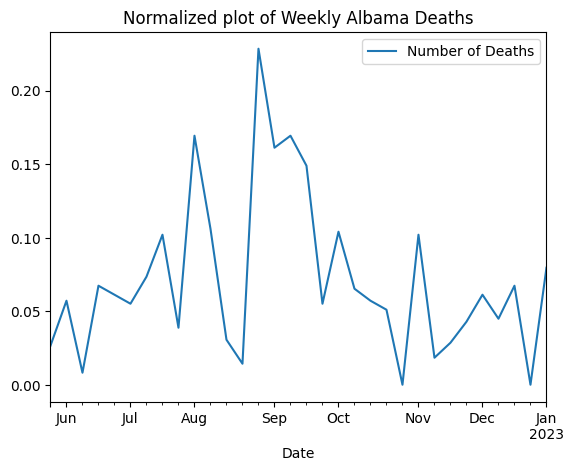

In [23]:
normalized_weekly_deaths_sum_selected_state_given_range.plot(x='Date', y='Number of Deaths', title = 'Normalized plot of Weekly Albama Deaths')

In [24]:
deaths_selected_state_NJ = deaths_transpose[deaths_transpose["State"] == selected_state_NJ].reset_index()
deaths_selected_state_NJ.head()

,index,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
0,1805,34001,Atlantic County,NJ,34,2020-01-22,0
1,1806,34003,Bergen County,NJ,34,2020-01-22,0
2,1807,34005,Burlington County,NJ,34,2020-01-22,0
3,1808,34007,Camden County,NJ,34,2020-01-22,0
4,1809,34009,Cape May County,NJ,34,2020-01-22,0


In [25]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_state_daily_NJ = deaths_selected_state_NJ.groupby('Date')['Number of Deaths'].sum()
deaths_selected_state_daily_NJ.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Deaths, dtype: int64

In [26]:
#Finding out the new deaths per day.
new_deaths_selected_state_daily_NJ = deaths_selected_state_daily_NJ.diff().reset_index()
new_deaths_selected_state_daily_NJ.head()

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [27]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_deaths_mean_selected_state_NJ= new_deaths_selected_state_daily_NJ.copy()
weekly_deaths_mean_selected_state_NJ['Date'] = pd.to_datetime(weekly_deaths_mean_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mean_selected_state_NJ = weekly_deaths_mean_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].mean()
weekly_deaths_mean_selected_state_NJ = weekly_deaths_mean_selected_state_NJ.reset_index()
weekly_deaths_mean_selected_state_NJ.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [28]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mean_selected_state_given_range_NJ = weekly_deaths_mean_selected_state_NJ[(weekly_deaths_mean_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_deaths_mean_selected_state_NJ["Date"] <= '2023-01-02')]
weekly_deaths_mean_selected_state_given_range_NJ = weekly_deaths_mean_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mean_selected_state_given_range_NJ['Date'] = weekly_deaths_mean_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mean_selected_state_given_range_NJ

,Date,Number of Deaths
0,2022-05-30,9.857143
1,2022-06-06,11.285714
2,2022-06-13,14.142857
3,2022-06-20,10.571429
4,2022-06-27,9.000000
5,2022-07-04,6.000000
6,2022-07-11,7.571429
7,2022-07-18,5.285714
8,2022-07-25,7.285714
9,2022-08-01,11.428571


<AxesSubplot: title={'center': 'Mean of Weekly Newjersey Deaths'}, xlabel='Date'>

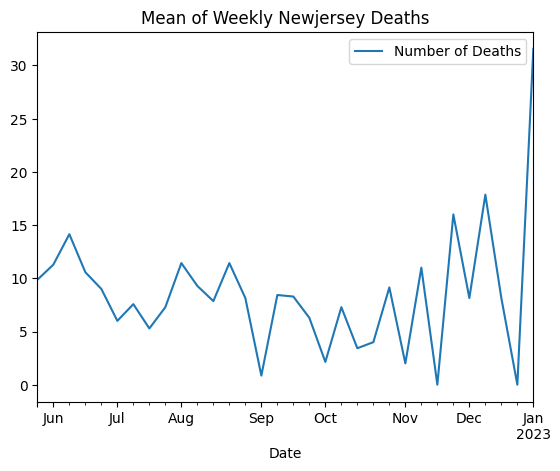

In [29]:
#Plotting the mean graph
weekly_deaths_mean_selected_state_given_range_NJ.plot(x='Date', y='Number of Deaths', title = 'Mean of Weekly Newjersey Deaths')

In [30]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_deaths_median_selected_state_NJ = new_deaths_selected_state_daily_NJ.copy()
weekly_deaths_median_selected_state_NJ['Date'] = pd.to_datetime(weekly_deaths_median_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_median_selected_state_NJ = weekly_deaths_median_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].median()
weekly_deaths_median_selected_state_NJ = weekly_deaths_median_selected_state_NJ.reset_index()
weekly_deaths_median_selected_state_NJ.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [31]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_median_selected_state_given_range_NJ = weekly_deaths_median_selected_state_NJ[(weekly_deaths_median_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_deaths_median_selected_state_NJ["Date"] <= '2023-01-02')]
weekly_deaths_median_selected_state_given_range_NJ = weekly_deaths_median_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_median_selected_state_given_range_NJ['Date'] = weekly_deaths_median_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_median_selected_state_given_range_NJ

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,17.0
3,2022-06-20,10.0
4,2022-06-27,13.0
5,2022-07-04,0.0
6,2022-07-11,7.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,13.0


<AxesSubplot: title={'center': 'Median of Weekly Newjersey Deaths'}, xlabel='Date'>

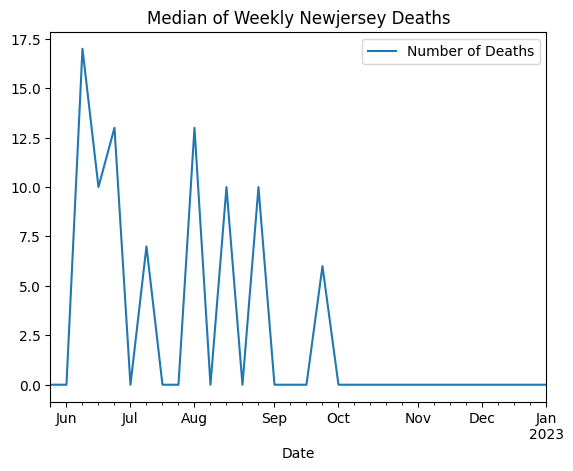

In [32]:
#Plotting the median graph
weekly_deaths_median_selected_state_given_range_NJ.plot(x='Date', y='Number of Deaths', title = 'Median of Weekly Newjersey Deaths')

In [33]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_deaths_mode_selected_state_NJ = new_deaths_selected_state_daily_NJ.copy()
weekly_deaths_mode_selected_state_NJ['Date'] = pd.to_datetime(weekly_deaths_mode_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mode_selected_state_NJ = weekly_deaths_mode_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].apply(statistics.mode)
weekly_deaths_mode_selected_state_NJ = weekly_deaths_mode_selected_state_NJ.reset_index()
weekly_deaths_mode_selected_state_NJ.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [34]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mode_selected_state_given_range_NJ = weekly_deaths_mode_selected_state_NJ[(weekly_deaths_mode_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_deaths_mode_selected_state_NJ["Date"] <= '2023-01-02')]
weekly_deaths_mode_selected_state_given_range_NJ = weekly_deaths_mode_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mode_selected_state_given_range_NJ['Date'] = weekly_deaths_mode_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mode_selected_state_given_range_NJ

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,13.0
5,2022-07-04,0.0
6,2022-07-11,7.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Newjersey Deaths'}, xlabel='Date'>

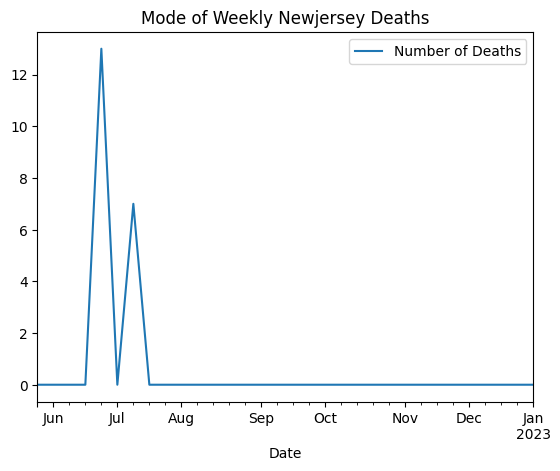

In [35]:
#Plottinf the mode graph
weekly_deaths_mode_selected_state_given_range_NJ.plot(x='Date', y='Number of Deaths', title = 'Mode of Weekly Newjersey Deaths')

In [36]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_deaths_sum_selected_state_NJ = new_deaths_selected_state_daily_NJ.copy()
weekly_deaths_sum_selected_state_NJ['Date'] = pd.to_datetime(weekly_deaths_sum_selected_state_NJ['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_sum_selected_state_NJ = weekly_deaths_sum_selected_state_NJ.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_sum_selected_state_NJ = weekly_deaths_sum_selected_state_NJ.reset_index()
weekly_deaths_sum_selected_state_NJ.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [37]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_deaths_sum_selected_state_given_range_NJ = weekly_deaths_sum_selected_state_NJ[(weekly_deaths_sum_selected_state_NJ["Date"] >= '2022-05-29') & (weekly_deaths_sum_selected_state_NJ["Date"] <= '2023-01-02')]
weekly_deaths_sum_selected_state_given_range_NJ = weekly_deaths_sum_selected_state_given_range_NJ.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_sum_selected_state_given_range_NJ['Date'] = weekly_deaths_sum_selected_state_given_range_NJ['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_sum_selected_state_given_range_NJ

,Date,Number of Deaths
0,2022-05-30,69.0
1,2022-06-06,79.0
2,2022-06-13,99.0
3,2022-06-20,74.0
4,2022-06-27,63.0
5,2022-07-04,42.0
6,2022-07-11,53.0
7,2022-07-18,37.0
8,2022-07-25,51.0
9,2022-08-01,80.0


<AxesSubplot: title={'center': 'Deaths of Weekly Newjersey Deaths'}, xlabel='Date'>

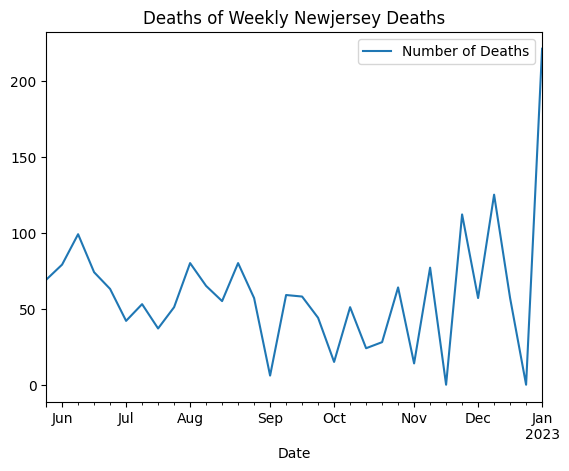

In [38]:
weekly_deaths_sum_selected_state_given_range_NJ.plot(x='Date', y='Number of Deaths', title = 'Deaths of Weekly Newjersey Deaths')

### Week starting with 2023-01-02 has a peak of deaths in newjersey state with value 212. As it was long weekend due to christmas and new year so many people gathered and had celebrations which might be reason for increased deaths.

In [39]:
#Filtering the population for NEWJERSEY state
population_selected_state_NJ = population[population["State"] == selected_state_NJ].reset_index()
del population_selected_state_NJ[population_selected_state_NJ.columns[0]]

population_selected_state_NJ

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,NJ,0
1,34001,Atlantic County,NJ,263670
2,34003,Bergen County,NJ,932202
3,34005,Burlington County,NJ,445349
4,34007,Camden County,NJ,506471
5,34009,Cape May County,NJ,92039
6,34011,Cumberland County,NJ,149527
7,34013,Essex County,NJ,798975
8,34015,Gloucester County,NJ,291636
9,34017,Hudson County,NJ,672391


In [40]:
#For the Albama state summing the population.
population_selected_state_NJ = population_selected_state_NJ.groupby('State')['population'].sum()
population_selected_state_NJ

State
NJ    8882190
Name: population, dtype: int64

In [41]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_deaths_sum_selected_state_given_range_NJ = weekly_deaths_sum_selected_state_given_range_NJ.copy()
normalized_weekly_deaths_sum_selected_state_given_range_NJ['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range_NJ['Number of Deaths'].mul(10000)
normalized_weekly_deaths_sum_selected_state_given_range_NJ['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range_NJ['Number of Deaths'].div(8882190)
normalized_weekly_deaths_sum_selected_state_given_range_NJ

,Date,Number of Deaths
0,2022-05-30,0.077684
1,2022-06-06,0.088942
2,2022-06-13,0.111459
3,2022-06-20,0.083313
4,2022-06-27,0.070928
5,2022-07-04,0.047286
6,2022-07-11,0.059670
7,2022-07-18,0.041656
8,2022-07-25,0.057418
9,2022-08-01,0.090068


<AxesSubplot: title={'center': 'Normalized plot of Weekly Newjersey Deaths'}, xlabel='Date'>

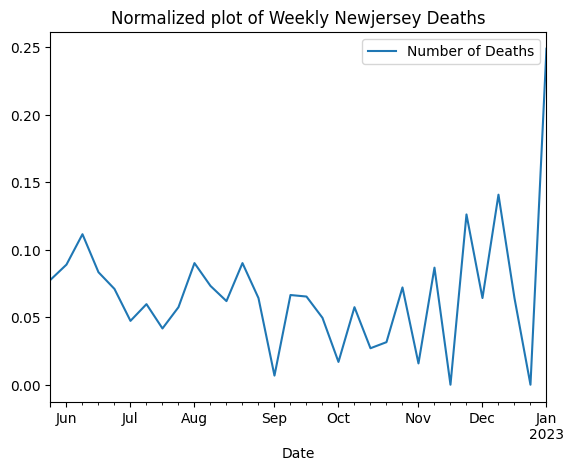

In [42]:
normalized_weekly_deaths_sum_selected_state_given_range_NJ.plot(x='Date', y='Number of Deaths', title = 'Normalized plot of Weekly Newjersey Deaths')

In [43]:
deaths_selected_state_MD = deaths_transpose[deaths_transpose["State"] == selected_state_MD].reset_index()
deaths_selected_state_MD.head()

,index,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
0,1214,24001,Allegany County,MD,24,2020-01-22,0
1,1215,24003,Anne Arundel County,MD,24,2020-01-22,0
2,1216,24005,Baltimore County,MD,24,2020-01-22,0
3,1217,24009,Calvert County,MD,24,2020-01-22,0
4,1218,24011,Caroline County,MD,24,2020-01-22,0


In [44]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_state_daily_MD = deaths_selected_state_MD.groupby('Date')['Number of Deaths'].sum()
deaths_selected_state_daily_MD.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Deaths, dtype: int64

In [45]:
#Finding out the new cases per day.
new_deaths_selected_state_daily_MD = deaths_selected_state_daily_MD.diff().reset_index()
new_deaths_selected_state_daily_MD.head()

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [46]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_deaths_mean_selected_state_MD = new_deaths_selected_state_daily_MD.copy()
weekly_deaths_mean_selected_state_MD['Date'] = pd.to_datetime(weekly_deaths_mean_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mean_selected_state_MD = weekly_deaths_mean_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].mean()
weekly_deaths_mean_selected_state_MD = weekly_deaths_mean_selected_state_MD.reset_index()
weekly_deaths_mean_selected_state_MD.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [47]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mean_selected_state_given_range_MD = weekly_deaths_mean_selected_state_MD[(weekly_deaths_mean_selected_state_MD["Date"] >= '2022-05-29') & (weekly_deaths_mean_selected_state_MD["Date"] <= '2023-01-02')]
weekly_deaths_mean_selected_state_given_range_MD = weekly_deaths_mean_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mean_selected_state_given_range_MD['Date'] = weekly_deaths_mean_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mean_selected_state_given_range_MD

,Date,Number of Deaths
0,2022-05-30,4.714286
1,2022-06-06,6.000000
2,2022-06-13,7.285714
3,2022-06-20,5.857143
4,2022-06-27,5.714286
5,2022-07-04,5.142857
6,2022-07-11,5.142857
7,2022-07-18,5.714286
8,2022-07-25,9.000000
9,2022-08-01,5.571429


<AxesSubplot: title={'center': 'Mean of Weekly Maryland Deaths'}, xlabel='Date'>

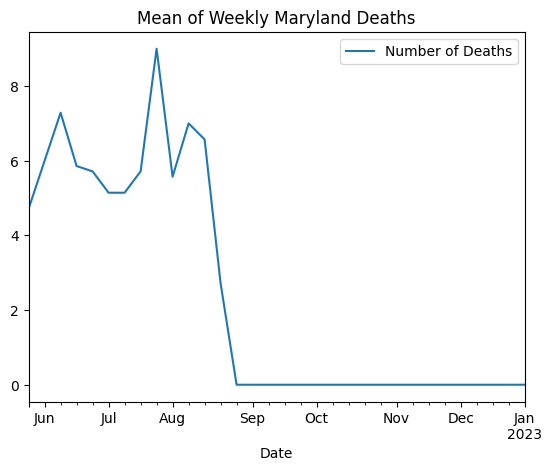

In [48]:
#Plotting the mean graph
weekly_deaths_mean_selected_state_given_range_MD.plot(x='Date', y='Number of Deaths', title = 'Mean of Weekly Maryland Deaths')

In [49]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_deaths_median_selected_state_MD = new_deaths_selected_state_daily_MD.copy()
weekly_deaths_median_selected_state_MD['Date'] = pd.to_datetime(weekly_deaths_median_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_median_selected_state_MD = weekly_deaths_median_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].median()
weekly_deaths_median_selected_state_MD = weekly_deaths_median_selected_state_MD.reset_index()
weekly_deaths_median_selected_state_MD.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [50]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_median_selected_state_given_range_MD = weekly_deaths_median_selected_state_MD[(weekly_deaths_median_selected_state_MD["Date"] >= '2022-05-29') & (weekly_deaths_median_selected_state_MD["Date"] <= '2023-01-02')]
weekly_deaths_median_selected_state_given_range_MD = weekly_deaths_median_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_median_selected_state_given_range_MD['Date'] = weekly_deaths_median_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_median_selected_state_given_range_MD

,Date,Number of Deaths
0,2022-05-30,4.0
1,2022-06-06,6.0
2,2022-06-13,10.0
3,2022-06-20,4.0
4,2022-06-27,6.0
5,2022-07-04,2.0
6,2022-07-11,6.0
7,2022-07-18,4.0
8,2022-07-25,8.0
9,2022-08-01,5.0


<AxesSubplot: title={'center': 'Median of Weekly Maryland Deaths'}, xlabel='Date'>

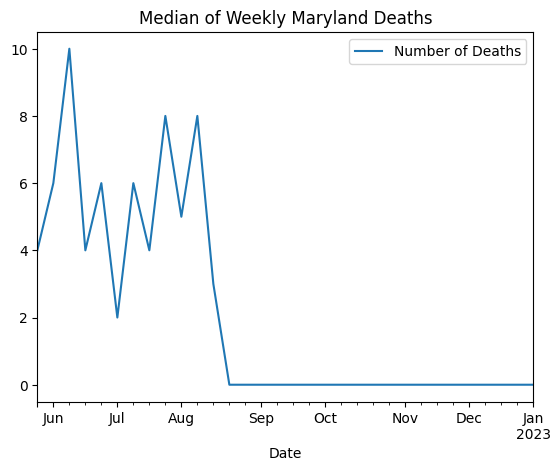

In [51]:
#Plotting the median graph
weekly_deaths_median_selected_state_given_range_MD.plot(x='Date', y='Number of Deaths', title = 'Median of Weekly Maryland Deaths')

In [52]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_deaths_mode_selected_state_MD = new_deaths_selected_state_daily_MD.copy()
weekly_deaths_mode_selected_state_MD['Date'] = pd.to_datetime(weekly_deaths_mode_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mode_selected_state_MD = weekly_deaths_mode_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].apply(statistics.mode)
weekly_deaths_mode_selected_state_MD = weekly_deaths_mode_selected_state_MD.reset_index()
weekly_deaths_mode_selected_state_MD.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [53]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mode_selected_state_given_range_MD = weekly_deaths_mode_selected_state_MD[(weekly_deaths_mode_selected_state_MD["Date"] >= '2022-05-29') & (weekly_deaths_mode_selected_state_MD["Date"] <= '2023-01-02')]
weekly_deaths_mode_selected_state_given_range_MD = weekly_deaths_mode_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mode_selected_state_given_range_MD['Date'] = weekly_deaths_mode_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mode_selected_state_given_range_MD

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,10.0
3,2022-06-20,0.0
4,2022-06-27,6.0
5,2022-07-04,0.0
6,2022-07-11,6.0
7,2022-07-18,4.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly Maryland Deaths'}, xlabel='Date'>

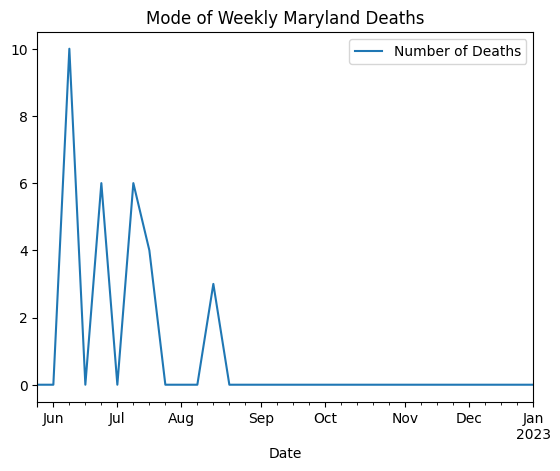

In [54]:
#Plottinf the mode graph
weekly_deaths_mode_selected_state_given_range_MD.plot(x='Date', y='Number of Deaths', title = 'Mode of Weekly Maryland Deaths')

In [55]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_deaths_sum_selected_state_MD = new_deaths_selected_state_daily_MD.copy()
weekly_deaths_sum_selected_state_MD['Date'] = pd.to_datetime(weekly_deaths_sum_selected_state_MD['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_sum_selected_state_MD = weekly_deaths_sum_selected_state_MD.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_sum_selected_state_MD = weekly_deaths_sum_selected_state_MD.reset_index()
weekly_deaths_sum_selected_state_MD.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [56]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_deaths_sum_selected_state_given_range_MD = weekly_deaths_sum_selected_state_MD[(weekly_deaths_sum_selected_state_MD["Date"] >= '2022-05-29') & (weekly_deaths_sum_selected_state_MD["Date"] <= '2023-01-02')]
weekly_deaths_sum_selected_state_given_range_MD = weekly_deaths_sum_selected_state_given_range_MD.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_sum_selected_state_given_range_MD['Date'] = weekly_deaths_sum_selected_state_given_range_MD['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_sum_selected_state_given_range_MD

,Date,Number of Deaths
0,2022-05-30,33.0
1,2022-06-06,42.0
2,2022-06-13,51.0
3,2022-06-20,41.0
4,2022-06-27,40.0
5,2022-07-04,36.0
6,2022-07-11,36.0
7,2022-07-18,40.0
8,2022-07-25,63.0
9,2022-08-01,39.0


<AxesSubplot: title={'center': 'Deaths of Weekly Maryland Deaths'}, xlabel='Date'>

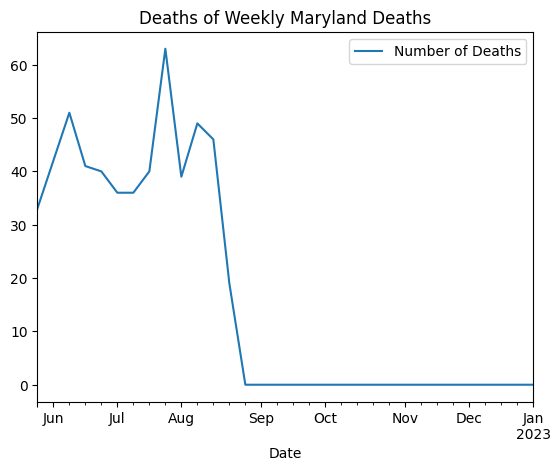

In [57]:
weekly_deaths_sum_selected_state_given_range_MD.plot(x='Date', y='Number of Deaths', title = 'Deaths of Weekly Maryland Deaths')

### week starting with 2022-07-25 has a peak of deaths in maryland state with value 63. Due to independence day holiday on 4th of july maybe cases have increased and after two weeks the deaths got affected.

In [58]:
#Filtering the population for ARIZONA state
population_selected_state_MD = population[population["State"] == selected_state_MD].reset_index()
del population_selected_state_MD[population_selected_state_MD.columns[0]]

population_selected_state_MD

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,MD,0
1,24001,Allegany County,MD,70416
2,24003,Anne Arundel County,MD,579234
3,24005,Baltimore County,MD,827370
4,24009,Calvert County,MD,92525
5,24011,Caroline County,MD,33406
6,24013,Carroll County,MD,168447
7,24015,Cecil County,MD,102855
8,24017,Charles County,MD,163257
9,24019,Dorchester County,MD,31929


In [59]:
#For the Albama state summing the population.
population_selected_state_MD = population_selected_state_MD.groupby('State')['population'].sum()
population_selected_state_MD

State
MD    6045680
Name: population, dtype: int64

In [60]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_deaths_sum_selected_state_given_range_MD = weekly_deaths_sum_selected_state_given_range_MD.copy()
normalized_weekly_deaths_sum_selected_state_given_range_MD['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range_MD['Number of Deaths'].mul(10000)
normalized_weekly_deaths_sum_selected_state_given_range_MD['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range_MD['Number of Deaths'].div(6045680)
normalized_weekly_deaths_sum_selected_state_given_range_MD

,Date,Number of Deaths
0,2022-05-30,0.054584
1,2022-06-06,0.069471
2,2022-06-13,0.084358
3,2022-06-20,0.067817
4,2022-06-27,0.066163
5,2022-07-04,0.059547
6,2022-07-11,0.059547
7,2022-07-18,0.066163
8,2022-07-25,0.104207
9,2022-08-01,0.064509


<AxesSubplot: title={'center': 'Normalized plot of Weekly Maryland Deaths'}, xlabel='Date'>

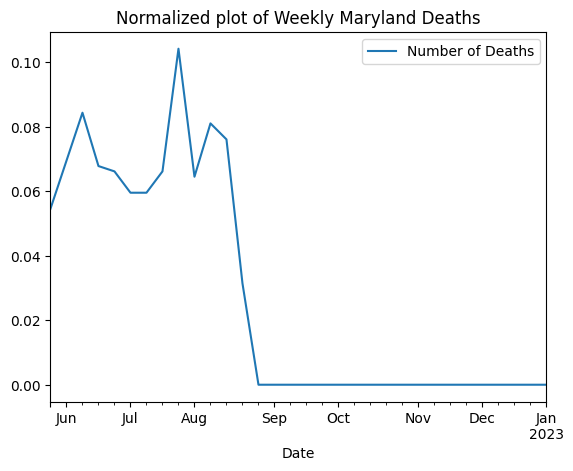

In [61]:
normalized_weekly_deaths_sum_selected_state_given_range_MD.plot(x='Date', y='Number of Deaths', title = 'Normalized plot of Weekly Maryland Deaths')

In [62]:
deaths_selected_state_NC = deaths_transpose[deaths_transpose["State"] == selected_state_NC].reset_index()
deaths_selected_state_NC.head()

,index,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
0,1924,37001,Alamance County,NC,37,2020-01-22,0
1,1925,37003,Alexander County,NC,37,2020-01-22,0
2,1926,37005,Alleghany County,NC,37,2020-01-22,0
3,1927,37007,Anson County,NC,37,2020-01-22,0
4,1928,37009,Ashe County,NC,37,2020-01-22,0


In [63]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_state_daily_NC = deaths_selected_state_NC.groupby('Date')['Number of Deaths'].sum()
deaths_selected_state_daily_NC.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Deaths, dtype: int64

In [64]:
#Finding out the new cases per day.
new_deaths_selected_state_daily_NC = deaths_selected_state_daily_NC.diff().reset_index()
new_deaths_selected_state_daily_NC.head()

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [65]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_deaths_mean_selected_state_NC = new_deaths_selected_state_daily_NC.copy()
weekly_deaths_mean_selected_state_NC['Date'] = pd.to_datetime(weekly_deaths_mean_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mean_selected_state_NC = weekly_deaths_mean_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].mean()
weekly_deaths_mean_selected_state_NC = weekly_deaths_mean_selected_state_NC.reset_index()
weekly_deaths_mean_selected_state_NC.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [66]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mean_selected_state_given_range_NC = weekly_deaths_mean_selected_state_NC[(weekly_deaths_mean_selected_state_NC["Date"] >= '2022-05-29') & (weekly_deaths_mean_selected_state_NC["Date"] <= '2023-01-02')]
weekly_deaths_mean_selected_state_given_range_NC = weekly_deaths_mean_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mean_selected_state_given_range_NC['Date'] = weekly_deaths_mean_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mean_selected_state_given_range_NC

,Date,Number of Deaths
0,2022-05-30,1.285714
1,2022-06-06,63.000000
2,2022-06-13,6.571429
3,2022-06-20,1.571429
4,2022-06-27,8.285714
5,2022-07-04,6.857143
6,2022-07-11,19.714286
7,2022-07-18,5.714286
8,2022-07-25,6.857143
9,2022-08-01,29.142857


<AxesSubplot: title={'center': 'Mean of Weekly North Carolina Deaths'}, xlabel='Date'>

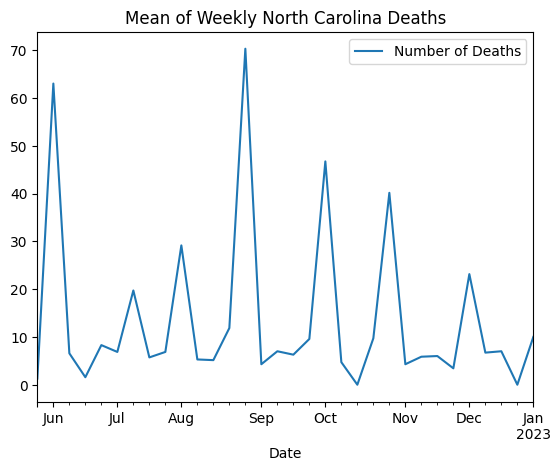

In [67]:
weekly_deaths_mean_selected_state_given_range_NC.plot(x='Date', y='Number of Deaths', title = 'Mean of Weekly North Carolina Deaths')

In [68]:
#Converting the daily to weekly analysis and finding the median weekly.
weekly_deaths_median_selected_state_NC = new_deaths_selected_state_daily_NC.copy()
weekly_deaths_median_selected_state_NC['Date'] = pd.to_datetime(weekly_deaths_median_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_median_selected_state_NC = weekly_deaths_median_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].median()
weekly_deaths_median_selected_state_NC = weekly_deaths_median_selected_state_NC.reset_index()
weekly_deaths_median_selected_state_NC.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [69]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_median_selected_state_given_range_NC = weekly_deaths_median_selected_state_NC[(weekly_deaths_median_selected_state_NC["Date"] >= '2022-05-29') & (weekly_deaths_median_selected_state_NC["Date"] <= '2023-01-02')]
weekly_deaths_median_selected_state_given_range_NC = weekly_deaths_median_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_median_selected_state_given_range_NC['Date'] = weekly_deaths_median_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_median_selected_state_given_range_NC

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Median of Weekly North Carolina Deaths'}, xlabel='Date'>

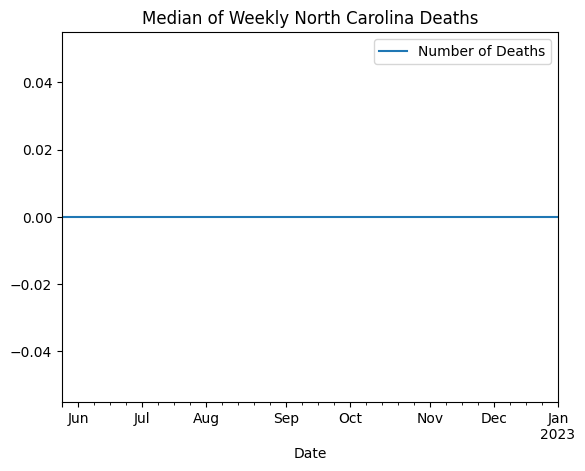

In [70]:
weekly_deaths_median_selected_state_given_range_NC.plot(x='Date', y='Number of Deaths', title = 'Median of Weekly North Carolina Deaths')

In [71]:
#Converting the daily to weekly analysis and finding the mode weekly.
weekly_deaths_mode_selected_state_NC = new_deaths_selected_state_daily_NC.copy()
weekly_deaths_mode_selected_state_NC['Date'] = pd.to_datetime(weekly_deaths_mode_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_mode_selected_state_NC = weekly_deaths_mode_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].apply(statistics.mode)
weekly_deaths_mode_selected_state_NC = weekly_deaths_mode_selected_state_NC.reset_index()
weekly_deaths_mode_selected_state_NC.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [72]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_mode_selected_state_given_range_NC = weekly_deaths_mode_selected_state_NC[(weekly_deaths_mode_selected_state_NC["Date"] >= '2022-05-29') & (weekly_deaths_mode_selected_state_NC["Date"] <= '2023-01-02')]
weekly_deaths_mode_selected_state_given_range_NC = weekly_deaths_mode_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_mode_selected_state_given_range_NC['Date'] = weekly_deaths_mode_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_mode_selected_state_given_range_NC

,Date,Number of Deaths
0,2022-05-30,0.0
1,2022-06-06,0.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,0.0
5,2022-07-04,0.0
6,2022-07-11,0.0
7,2022-07-18,0.0
8,2022-07-25,0.0
9,2022-08-01,0.0


<AxesSubplot: title={'center': 'Mode of Weekly North Carolina Deaths'}, xlabel='Date'>

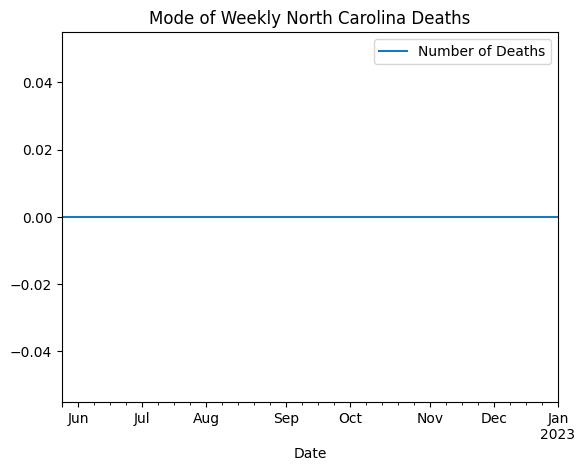

In [73]:
weekly_deaths_mode_selected_state_given_range_NC.plot(x='Date', y='Number of Deaths', title = 'Mode of Weekly North Carolina Deaths')

In [74]:
#Converting the daily to weekly analysis and finding the weekly sum of cases.
weekly_deaths_sum_selected_state_NC = new_deaths_selected_state_daily_NC.copy()
weekly_deaths_sum_selected_state_NC['Date'] = pd.to_datetime(weekly_deaths_sum_selected_state_NC['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_sum_selected_state_NC = weekly_deaths_sum_selected_state_NC.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_sum_selected_state_NC = weekly_deaths_sum_selected_state_NC.reset_index()
weekly_deaths_sum_selected_state_NC.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [75]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_deaths_sum_selected_state_given_range_NC = weekly_deaths_sum_selected_state_NC[(weekly_deaths_sum_selected_state_NC["Date"] >= '2022-05-29') & (weekly_deaths_sum_selected_state_NC["Date"] <= '2023-01-02')]
weekly_deaths_sum_selected_state_given_range_NC = weekly_deaths_sum_selected_state_given_range_NC.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_sum_selected_state_given_range_NC['Date'] = weekly_deaths_sum_selected_state_given_range_NC['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_sum_selected_state_given_range_NC

,Date,Number of Deaths
0,2022-05-30,9.0
1,2022-06-06,441.0
2,2022-06-13,46.0
3,2022-06-20,11.0
4,2022-06-27,58.0
5,2022-07-04,48.0
6,2022-07-11,138.0
7,2022-07-18,40.0
8,2022-07-25,48.0
9,2022-08-01,204.0


<AxesSubplot: title={'center': 'Deaths of Weekly North Carolina Deaths'}, xlabel='Date'>

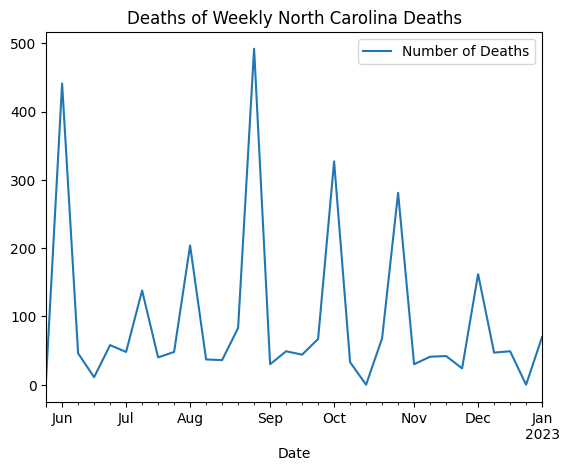

In [76]:
weekly_deaths_sum_selected_state_given_range_NC.plot(x='Date', y='Number of Deaths', title = 'Deaths of Weekly North Carolina Deaths')

### week starting with 2022-08-29 has a peak in northcarolina state with value 492. Due to holiday the deaths may have increased.

In [77]:
#Filtering the population for NorthCarolina state
population_selected_state_NC = population[population["State"] == selected_state_NC].reset_index()
del population_selected_state_NC[population_selected_state_NC.columns[0]]
population_selected_state_NC


,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,NC,0
1,37001,Alamance County,NC,169509
2,37003,Alexander County,NC,37497
3,37005,Alleghany County,NC,11137
4,37007,Anson County,NC,24446
...,...,...,...,...
96,37191,Wayne County,NC,123131
97,37193,Wilkes County,NC,68412
98,37195,Wilson County,NC,81801
99,37197,Yadkin County,NC,37667


In [78]:
#For the Albama state summing the population.
population_selected_state_NC = population_selected_state_NC.groupby('State')['population'].sum()
population_selected_state_NC

State
NC    10488084
Name: population, dtype: int64

In [79]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_deaths_sum_selected_state_given_range_NC = weekly_deaths_sum_selected_state_given_range_NC.copy()
normalized_weekly_deaths_sum_selected_state_given_range_NC['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range_NC['Number of Deaths'].mul(10000)
normalized_weekly_deaths_sum_selected_state_given_range_NC['Number of Deaths'] = normalized_weekly_deaths_sum_selected_state_given_range_NC['Number of Deaths'].div(10488084)
normalized_weekly_deaths_sum_selected_state_given_range_NC

,Date,Number of Deaths
0,2022-05-30,0.008581
1,2022-06-06,0.420477
2,2022-06-13,0.043859
3,2022-06-20,0.010488
4,2022-06-27,0.055301
5,2022-07-04,0.045766
6,2022-07-11,0.131578
7,2022-07-18,0.038139
8,2022-07-25,0.045766
9,2022-08-01,0.194506


<AxesSubplot: title={'center': 'Normalized plot of Weekly North Carolina Deaths'}, xlabel='Date'>

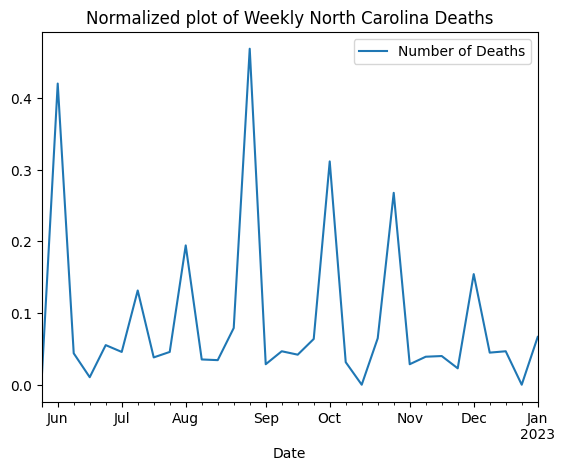

In [80]:
normalized_weekly_deaths_sum_selected_state_given_range_NC.plot(x='Date', y='Number of Deaths', title = 'Normalized plot of Weekly North Carolina Deaths')

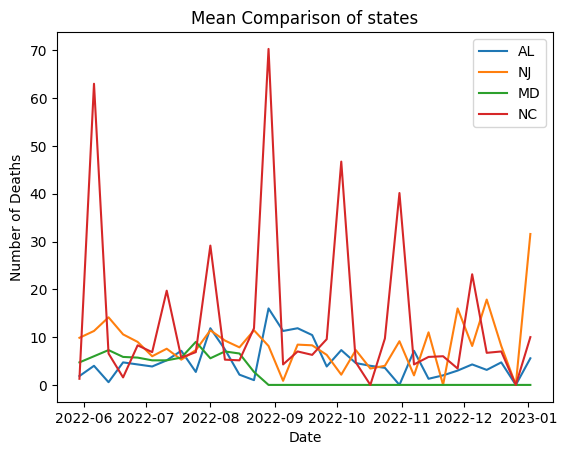

In [81]:
#Mean plot comparision of three states with alabama state.
plt.plot(weekly_deaths_mean_selected_state_given_range['Date'], weekly_deaths_mean_selected_state_given_range['Number of Deaths'], label='AL')
plt.plot(weekly_deaths_mean_selected_state_given_range_NJ['Date'], weekly_deaths_mean_selected_state_given_range_NJ['Number of Deaths'], label='NJ')
plt.plot(weekly_deaths_mean_selected_state_given_range_MD['Date'], weekly_deaths_mean_selected_state_given_range_MD['Number of Deaths'], label='MD')
plt.plot(weekly_deaths_mean_selected_state_given_range_NC['Date'], weekly_deaths_mean_selected_state_given_range_NC['Number of Deaths'], label='NC')
plt.title('Mean Comparison of states')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

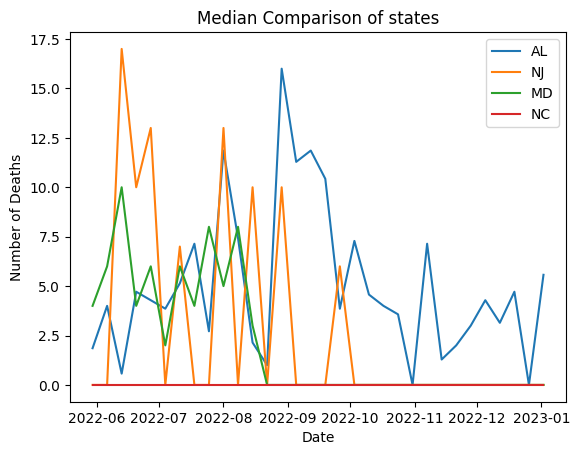

In [82]:
#Median plot comparision of three states with alabama state.
plt.plot(weekly_deaths_median_selected_state_given_range['Date'], weekly_deaths_mean_selected_state_given_range['Number of Deaths'], label='AL')
plt.plot(weekly_deaths_median_selected_state_given_range_NJ['Date'], weekly_deaths_median_selected_state_given_range_NJ['Number of Deaths'], label='NJ')
plt.plot(weekly_deaths_median_selected_state_given_range_MD['Date'], weekly_deaths_median_selected_state_given_range_MD['Number of Deaths'], label='MD')
plt.plot(weekly_deaths_median_selected_state_given_range_NC['Date'], weekly_deaths_median_selected_state_given_range_NC['Number of Deaths'], label='NC')
plt.title('Median Comparison of states')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

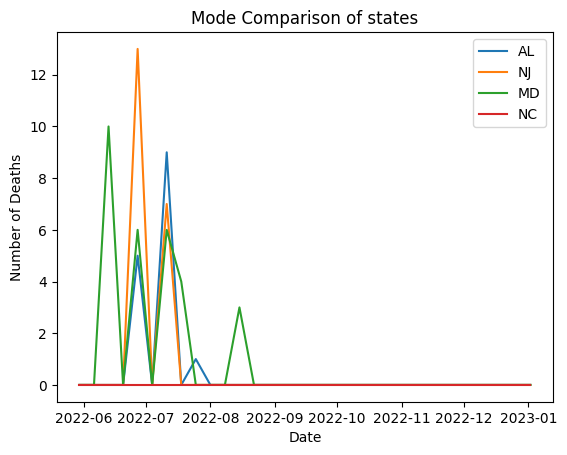

In [83]:
#Mode plot comparision of three states with alabama state.
plt.plot(weekly_deaths_mode_selected_state_given_range['Date'], weekly_deaths_mode_selected_state_given_range['Number of Deaths'], label='AL')
plt.plot(weekly_deaths_mode_selected_state_given_range_NJ['Date'], weekly_deaths_mode_selected_state_given_range_NJ['Number of Deaths'], label='NJ')
plt.plot(weekly_deaths_mode_selected_state_given_range_MD['Date'], weekly_deaths_mode_selected_state_given_range_MD['Number of Deaths'], label='MD')
plt.plot(weekly_deaths_mode_selected_state_given_range_NC['Date'], weekly_deaths_mode_selected_state_given_range_NC['Number of Deaths'], label='NC')
plt.title('Mode Comparison of states')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

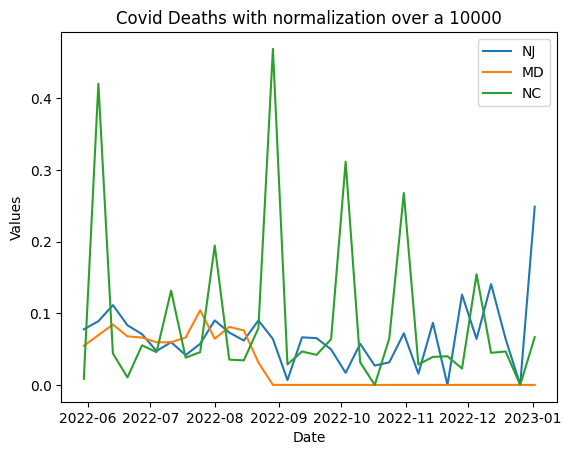

In [84]:
#Normalized Plots of the three States.
plt.plot(normalized_weekly_deaths_sum_selected_state_given_range_NJ['Date'], normalized_weekly_deaths_sum_selected_state_given_range_NJ['Number of Deaths'], label='NJ')
plt.plot(normalized_weekly_deaths_sum_selected_state_given_range_MD['Date'], normalized_weekly_deaths_sum_selected_state_given_range_MD['Number of Deaths'], label='MD')
plt.plot(normalized_weekly_deaths_sum_selected_state_given_range_NC['Date'], normalized_weekly_deaths_sum_selected_state_given_range_NC['Number of Deaths'], label='NC')
plt.title('Covid Deaths with normalization over a 10000')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [85]:
#For the selected state Albama summing the cases per day of all the counties.
deaths_transpose = deaths_transpose.groupby('Date')['Number of Deaths'].sum()
deaths_transpose.head()

Date
2020-01-22    1
2020-01-23    1
2020-01-24    1
2020-01-25    1
2020-01-26    1
Name: Number of Deaths, dtype: int64

In [86]:
#Finding out the new deaths per day.
new_deaths_country_daily = deaths_transpose.diff().reset_index()
new_deaths_country_daily.head()

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [87]:
#Converting the daily to weekly analysis and finding the sum weekly.
weekly_deaths_sum_country = new_deaths_country_daily.copy()
weekly_deaths_sum_country['Date'] = pd.to_datetime(weekly_deaths_sum_country['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_sum_country = weekly_deaths_sum_country.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_sum_country = weekly_deaths_sum_country.reset_index()
weekly_deaths_sum_country.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,1.0
3,2020-02-09,0.0
4,2020-02-16,1.0


In [88]:
#Adding one day so that we get weekly analysis from monday to sunday and weekly analsis from monday to sunday.
weekly_deaths_country_given_range = weekly_deaths_sum_country[(weekly_deaths_sum_country["Date"] >= '2022-05-29') & (weekly_deaths_sum_country["Date"] <= '2023-01-02')]
weekly_deaths_country_given_range = weekly_deaths_country_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_country_given_range['Date'] = weekly_deaths_country_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_country_given_range

,Date,Number of Deaths
0,2022-05-30,1226.0
1,2022-06-06,2062.0
2,2022-06-13,1771.0
3,2022-06-20,1540.0
4,2022-06-27,2478.0
5,2022-07-04,5225.0
6,2022-07-11,1220.0
7,2022-07-18,1831.0
8,2022-07-25,1901.0
9,2022-08-01,2346.0


In [89]:
#For the country summing the population.
population_country = population['population'].sum()
population_country

328239523

In [90]:
#normalizing by population and using normalization factor to identify cases
normalized_weekly_deaths_sum_country_given_range = weekly_deaths_country_given_range.copy()
normalized_weekly_deaths_sum_country_given_range['Number of Deaths'] = normalized_weekly_deaths_sum_country_given_range['Number of Deaths'].mul(10000)
normalized_weekly_deaths_sum_country_given_range['Number of Deaths'] = normalized_weekly_deaths_sum_country_given_range['Number of Deaths'].div(328239523)
normalized_weekly_deaths_sum_country_given_range

,Date,Number of Deaths
0,2022-05-30,0.037351
1,2022-06-06,0.062820
2,2022-06-13,0.053955
3,2022-06-20,0.046917
4,2022-06-27,0.075494
5,2022-07-04,0.159183
6,2022-07-11,0.037168
7,2022-07-18,0.055782
8,2022-07-25,0.057915
9,2022-08-01,0.071472


<AxesSubplot: title={'center': 'Normalized plot of Country of Cases'}, xlabel='Date'>

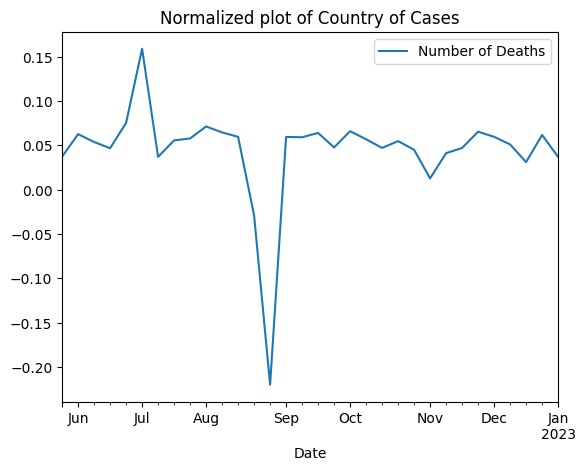

In [91]:
normalized_weekly_deaths_sum_country_given_range.plot(x='Date', y='Number of Deaths', title = 'Normalized plot of Country of Cases')

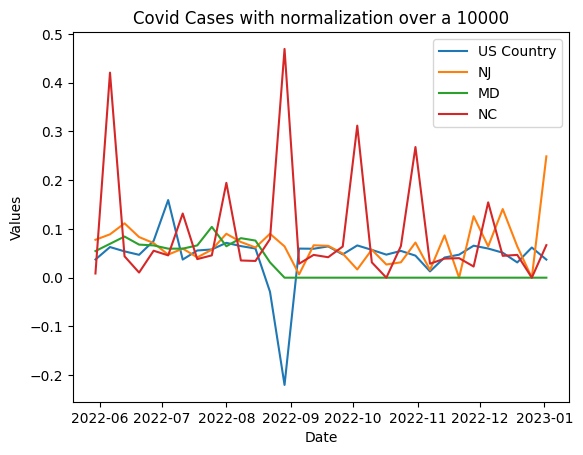

In [92]:
#Normalied Plot of US country and the three states.
plt.plot(normalized_weekly_deaths_sum_country_given_range['Date'], normalized_weekly_deaths_sum_country_given_range['Number of Deaths'], label='US Country')
plt.plot(normalized_weekly_deaths_sum_selected_state_given_range_NJ['Date'], normalized_weekly_deaths_sum_selected_state_given_range_NJ['Number of Deaths'], label='NJ')
plt.plot(normalized_weekly_deaths_sum_selected_state_given_range_MD['Date'], normalized_weekly_deaths_sum_selected_state_given_range_MD['Number of Deaths'], label='MD')
plt.plot(normalized_weekly_deaths_sum_selected_state_given_range_NC['Date'], normalized_weekly_deaths_sum_selected_state_given_range_NC['Number of Deaths'], label='NC')
plt.title('Covid Cases with normalization over a 10000')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

### Some of the Values in the data are negative when we take the daily new deaths we are getting negative value. So the States are following the country trends but not so closey excluding near the negative ones.

### NC and NJ have same polulation but NJ have significantly low death rate compared to NC, this is because of non-availability of data. For some dates deaths are zero in NJ but when I researched about it, Nj did have deaths and actually higher than NC.